In [5]:
import talib as ta
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [8]:
?talib.BRANDS
?talib.RSI

Object `talib.BRANDS` not found.
Object `talib.RSI` not found.


In [36]:
!pip install yfinance
!pip install yahoofinancials 
import yfinance as yf 
from yahoofinancials import YahooFinancials
import pandas as pd

In [37]:
df = yf.download('AAPL', '2019-1-1','2019-12-27')

[*********************100%***********************]  1 of 1 completed


In [38]:
aapl['Simple MA'] = ta.SMA(aapl['Close'],14)
aapl['EMA'] = ta.EMA(aapl['Close'], timeperiod = 14)


In [39]:
aapl['Simple MA'] = ta.SMA(aapl['Close'],14)
aapl['EMA'] = ta.EMA(aapl['Close'], timeperiod = 14)
print(aapl.tail())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-19  69.875000  70.294998  69.737503  70.004997  68.980354   98369200   
2019-12-20  70.557503  70.662498  69.639999  69.860001  68.837494  275978000   
2019-12-23  70.132500  71.062500  70.092499  71.000000  69.960793   98572000   
2019-12-24  71.172501  71.222504  70.730003  71.067497  70.027306   48478800   
2019-12-26  71.205002  72.495003  71.175003  72.477501  71.416679   93121200   

            Simple MA        EMA  
Date                              
2019-12-19  67.758035  68.261557  
2019-12-20  68.030892  68.474683  
2019-12-23  68.469285  68.811392  
2019-12-24  68.871606  69.112206  
2019-12-26  69.306071  69.560912  


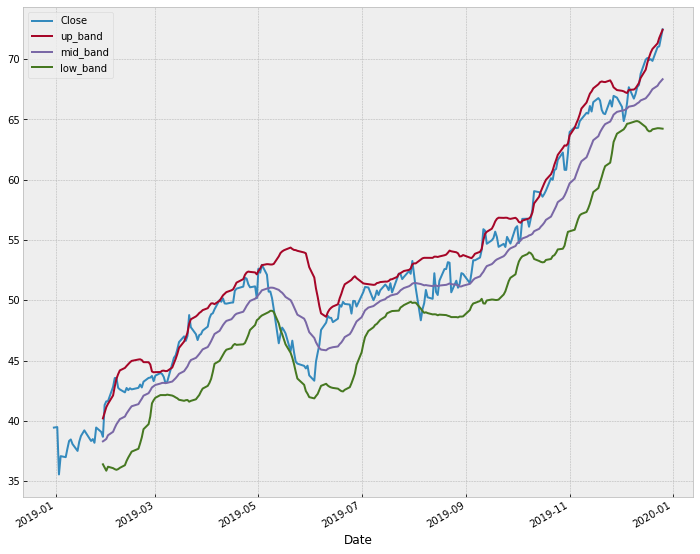

In [40]:
df['up_band'], df['mid_band'], df['low_band'] =  ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','up_band','mid_band','low_band']].plot(figsize= (12,10))
plt.show()

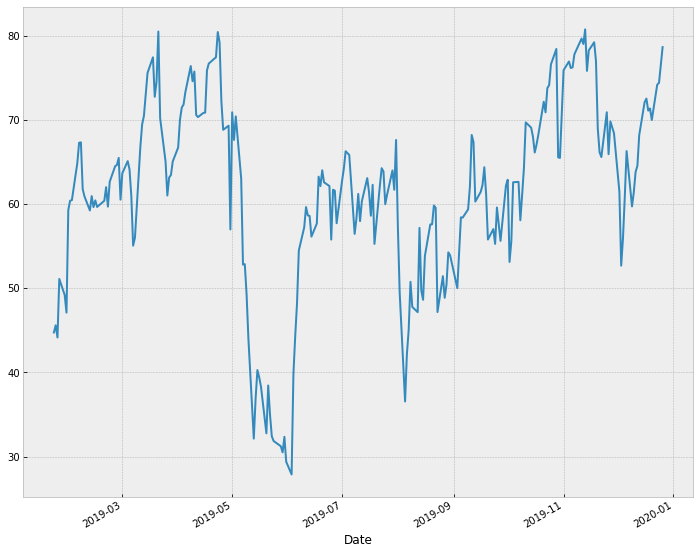

,Open,High,Low,Close,Adj Close,Volume,up_band,mid_band,low_band,Relative
Date,,,,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282608,140014000,NaN,NaN,NaN,NaN
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326286,148158800,NaN,NaN,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508713,365248800,NaN,NaN,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981861,234428400,NaN,NaN,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901775,219111200,NaN,NaN,NaN,NaN


In [41]:
df['Relative'] = ta.RSI(df['Close'],14)
df['Relative'].plot(figsize=(12,10))
plt.show()
df.head()

In [42]:
def VWAP(df):
    return (df['Adj Close'] * df['Volume']).sum() / df['Volume'].sum()

In [43]:

n = 14
df['VWAP'] = pd.concat([(pd.Series(VWAP(df.iloc[i:i+n]), index=[df.index[i+n]])) for i in range(len(df)-n)])

In [44]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,up_band,mid_band,low_band,Relative,VWAP
Date,,,,,,,,,,,
2019-01-29,39.062500,39.532501,38.527500,38.669998,37.539963,166348800,40.199229,38.294250,36.389270,47.112824,37.339448
2019-01-30,40.812500,41.537498,40.057499,41.312500,40.105244,244439200,40.658676,38.388125,36.117574,59.305467,37.427935
2019-01-31,41.527500,42.250000,41.139999,41.610001,40.394051,162958400,41.130472,38.494625,35.858778,60.412010,37.805645
2019-02-01,41.740002,42.244999,41.482498,41.630001,40.413464,130672400,41.407721,38.798750,36.189779,60.489792,38.069612
2019-02-04,41.852501,42.915001,41.820000,42.812500,41.561401,125982000,42.102290,39.086125,36.069960,64.882963,38.296285


No handles with labels found to put in legend.


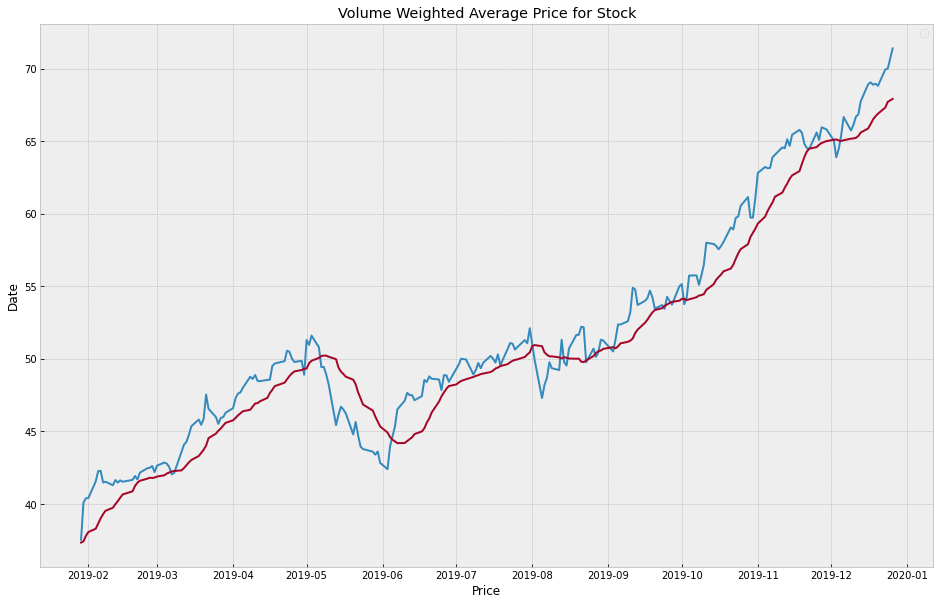

In [47]:

plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['VWAP'])
plt.title('Volume Weighted Average Price for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()